In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
df=pd.read_csv('nba.csv')
df

Name            Team  Number Position   Age Height  Weight  \
0    Avery Bradley  Boston Celtics     0.0       PG  25.0    6-2   180.0   
1      Jae Crowder  Boston Celtics    99.0       SF  25.0    6-6   235.0   
2     John Holland  Boston Celtics    30.0       SG  27.0    6-5   205.0   
3      R.J. Hunter  Boston Celtics    28.0       SG  22.0    6-5   185.0   
4    Jonas Jerebko  Boston Celtics     8.0       PF  29.0   6-10   231.0   
..             ...             ...     ...      ...   ...    ...     ...   
453   Shelvin Mack       Utah Jazz     8.0       PG  26.0    6-3   203.0   
454      Raul Neto       Utah Jazz    25.0       PG  24.0    6-1   179.0   
455   Tibor Pleiss       Utah Jazz    21.0        C  26.0    7-3   256.0   
456    Jeff Withey       Utah Jazz    24.0        C  26.0    7-0   231.0   
457            NaN             NaN     NaN      NaN   NaN    NaN     NaN   

               College     Salary  
0                Texas  7730337.0  
1            Marquette  6796117.0  
2    Boston University        NaN  
3        Georgia State  1148640.0  
4                  NaN  5000000.0  
..                 ...        ...  
453             Butler  2433333.0  
454                NaN   900000.0  
455                NaN  2900000.0  
456             Kansas   947276.0  
457                NaN        NaN  

[458 rows x 9 columns]

In [3]:
df.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

In [4]:
df.isna().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [5]:
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())

In [6]:
df['Number'] = df['Number'].fillna(df['Number'].mean())


In [7]:
df['Salary'] = df['Salary'].fillna(df['Salary'].quantile(0.5))  #same as median

In [8]:
df.isna().sum()

Name         1
Team         1
Number       0
Position     1
Age          1
Height       1
Weight       0
College     85
Salary       0
dtype: int64

In [9]:
df.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

In [10]:
#dropping
alpha = df.select_dtypes(include='object')

In [11]:
alpha.isna().sum()

Name         1
Team         1
Position     1
Height       1
College     85
dtype: int64

In [12]:
alpha.dropna(subset='College',axis=0,inplace=True)

In [13]:
alpha.isna().sum()

Name        0
Team        0
Position    0
Height      0
College     0
dtype: int64

In [24]:
#data transformation scaling for change
#min max
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

numeric = df.select_dtypes(include=np.number)

In [25]:
for i in numeric.columns:
    numeric[i]=(numeric[i]-numeric[i].min())/(numeric[i].max()-numeric[i].min())
numeric     

Number       Age    Weight    Salary
0    0.000000  0.285714  0.130137  0.308359
1    1.000000  0.285714  0.506849  0.270944
2    0.303030  0.380952  0.301370  0.112466
3    0.282828  0.142857  0.164384  0.044765
4    0.080808  0.476190  0.479452  0.199010
..        ...       ...       ...       ...
453  0.080808  0.333333  0.287671  0.096217
454  0.252525  0.238095  0.123288  0.034807
455  0.212121  0.333333  0.650685  0.114906
456  0.242424  0.333333  0.479452  0.036701
457  0.178569       NaN  0.414541  0.112466

[458 rows x 4 columns]

<Axes: >

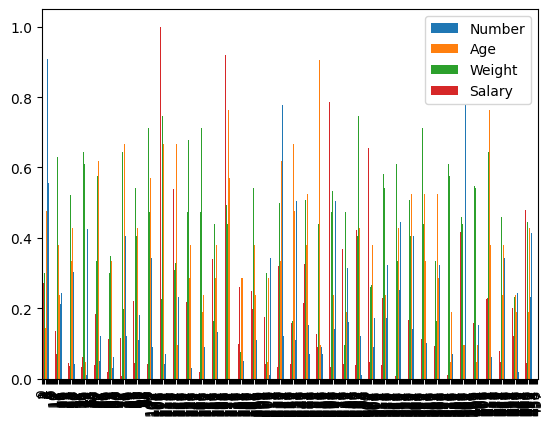

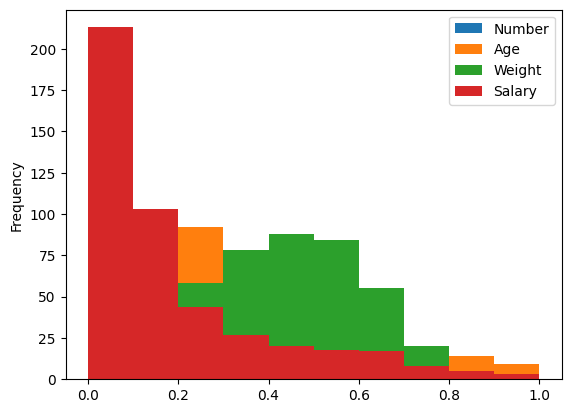

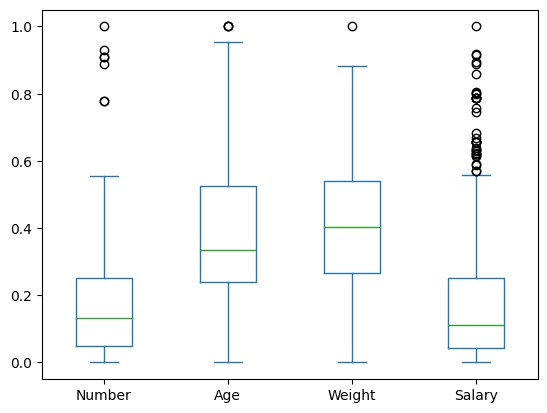

In [26]:
numeric.plot(kind='bar')
numeric.plot(kind='hist')
numeric.plot(kind='box')

In [32]:
zs = df.select_dtypes(include=np.number)

In [33]:
#z score

for i in zs.columns:
    zs[i] = (zs[i]-zs[i].mean())/zs[i].std()
zs    

Number       Age    Weight    Salary
0   -1.108456 -0.440219 -1.576454  0.568687
1    5.098980 -0.440219  0.511666  0.387989
2    0.772585  0.013912 -0.627308 -0.377387
3    0.647183 -1.121415 -1.386625 -0.704353
4   -0.606845  0.468043  0.359803  0.040582
..        ...       ...       ...       ...
453 -0.606845 -0.213153 -0.703240 -0.455866
454  0.459078 -0.667284 -1.614420 -0.752445
455  0.208273 -0.213153  1.308949 -0.365602
456  0.396377 -0.213153  0.359803 -0.743301
457  0.000000       NaN  0.000000 -0.377387

[458 rows x 4 columns]

<Axes: >

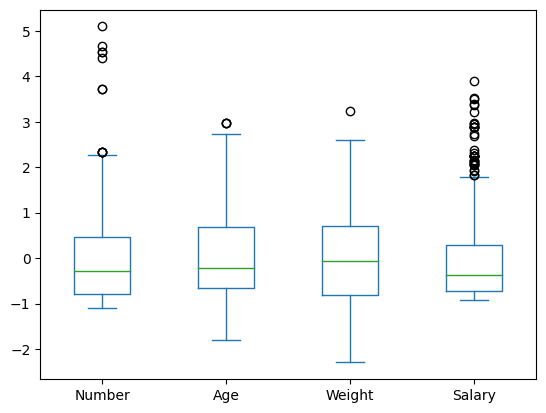

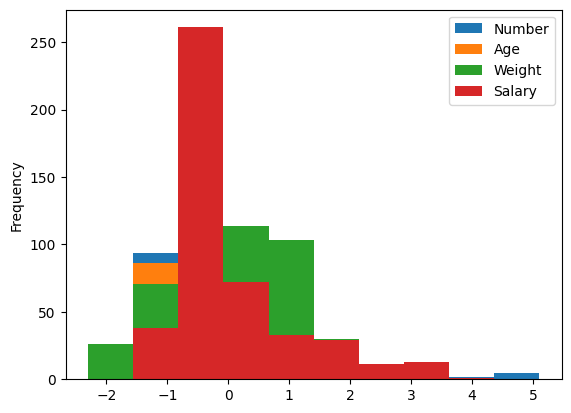

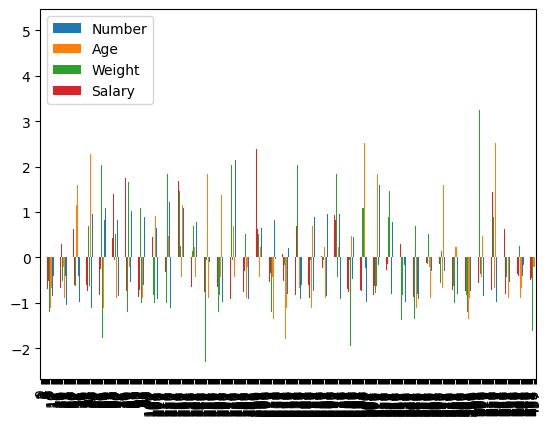

In [34]:
zs.plot(kind="box")
zs.plot(kind="hist")
zs.plot(kind="bar")

In [35]:
zs.skew()

Number    1.670199
Age       0.626349
Weight    0.113912
Salary    1.617114
dtype: float64

In [36]:
zs.mean()

Number    8.144868e-17
Age      -2.254457e-16
Weight    6.787390e-17
Salary   -2.666475e-17
dtype: float64

In [37]:
df['Weight2'] = np.exp(df['Weight'])

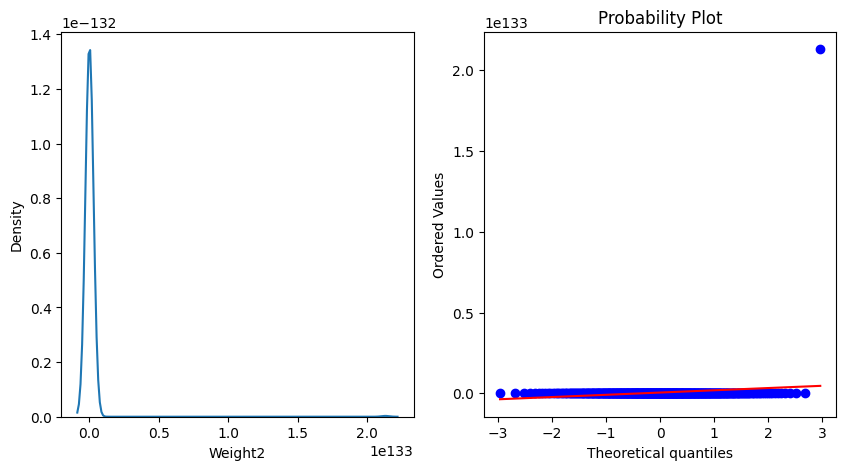

In [38]:
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()
normality(df,"Weight2")    